In [2]:
import dtvf
import numpy as np
import pandas as pd

#def main():
optimizer=dtvf.GA_OPtimizeDTVF(Ts = 0.001)
population = optimizer.init_population(size = 100)

#load sample data 1
df = pd.read_csv('data/sample.csv')
df = df.iloc[:,1:]

fitness = optimizer.cal_pop_fitness(population = population, 
                                    meas_time = 99, 
                                    input_x = df, 
                                    realweight = 22.51, 
                                    sol_per_pop = 10)

#select 5 fittest members
fittest_idx = np.argsort(fitness[:,1])[:5]

fittest_member=[]
for idx, mem in enumerate(fittest_idx):
    fittest_member.append(population[mem])

#flt=dtvf.DiscTimeVarFilt(Ts =0.001,**fittest_member[4])
#y_1 = flt.apply_filter(df,xs=0, ys=0)

In [3]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode()

params={'f_o': 102.56477161032994,
  'f_inf': 0.37628931919507025,
  'k': 2,
  'N_alpha': 69.15840035775419,
  'alpha': 0.11024145209189207}

flt=dtvf.DiscTimeVarFilt(Ts=0.001,**params)
y_1 = flt.apply_filter(df,xs=0, ys=0)



traces = []
for idx in range(0, y_1.shape[1]):
    traces.append(go.Scatter(y = y_1[:, idx],
                            mode = 'lines',
                            name = 'wvf'+str(idx+1)
                            )
                 )

iplot(traces)

In [5]:
#load sample data 2
df_cv = pd.read_csv('data/sample-cv.csv')
df_cv = df_cv.iloc[:,1:]

flt=dtvf.DiscTimeVarFilt(Ts=0.001,**params)
y_cv = flt.apply_filter(df_cv,xs=0, ys=0)

traces = []
for idx in range(0, y_cv.shape[1]):
    traces.append(go.Scatter(y = y_cv[:, idx],
                            mode = 'lines',
                            name = 'wvf'+str(idx+1)
                            )
                 )

iplot(traces)

In [9]:
[y_1[99,:].std()*3, y_1[99,:].mean()-22.51]

[0.3960369937944739, -0.5210394106829739]

In [10]:
[y_cv[99,:].std()*3, y_cv[99,:].mean()-22.51]

[0.5970513954800476, -0.5754010278163761]

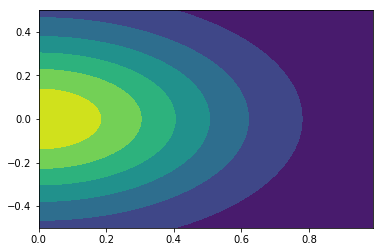

In [6]:

import numpy as np
import matplotlib.pyplot as plt

tx=np.arange(0,1,0.01)
ty=np.arange(-0.5,0.5,0.001)

sx=0.4
sy=0.3

x,y = np.meshgrid(tx,ty,sparse=True)
gauss=100*np.exp(-1*((x**2/(2*sx**2))+(y**2/(2*sy**2))))
plt.contourf(tx,ty,gauss)
plt.show()